<a href="https://colab.research.google.com/github/YazeedQasas/Housing_Prices_Prediction/blob/main/Housing%2BPrices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Price Prediction and Classification

In this project, the goal is to compare the performance of **Linear Regression**, **Logistic Regression**, and **K-Nearest Neighbors (KNN)** on the California Housing Prices dataset (with extra distance features). The dataset contains 14 attributes describing housing blocks in California from the 1990 census, including median house value, income, house age, rooms, population, households, latitude, longitude, and distances to the coast and major cities.[page:1]

We will:
- Predict **Median House Value** as a regression problem using Linear Regression and KNN Regression.
- Define a binary label (**expensive vs cheap**) from Median House Value and solve a classification problem using Logistic Regression and KNN Classification.


In [28]:
# Topic 1: Setup & Data Loading

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

# Make plots look nicer
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

RANDOM_STATE = 42

csv_path = "/content/California_Houses.csv"

df = pd.read_csv(csv_path)

print("Shape:", df.shape)
df.head()

df.info()
print("\nBasic statistics:")
display(df.describe().T)

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (20640, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  

,count,mean,std,min,25%,50%,75%,max
Median_House_Value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
Median_Income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
Median_Age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
Tot_Rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
Tot_Bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
Households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
Distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05



Missing values per column:
Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


## 2. Exploratory Data Analysis (EDA)

In this section, the goal is to understand the distribution of each feature, detect potential outliers, and examine correlations with the target `Median_House_Value`.[page:1] This will also help justify model choices and later feature engineering.

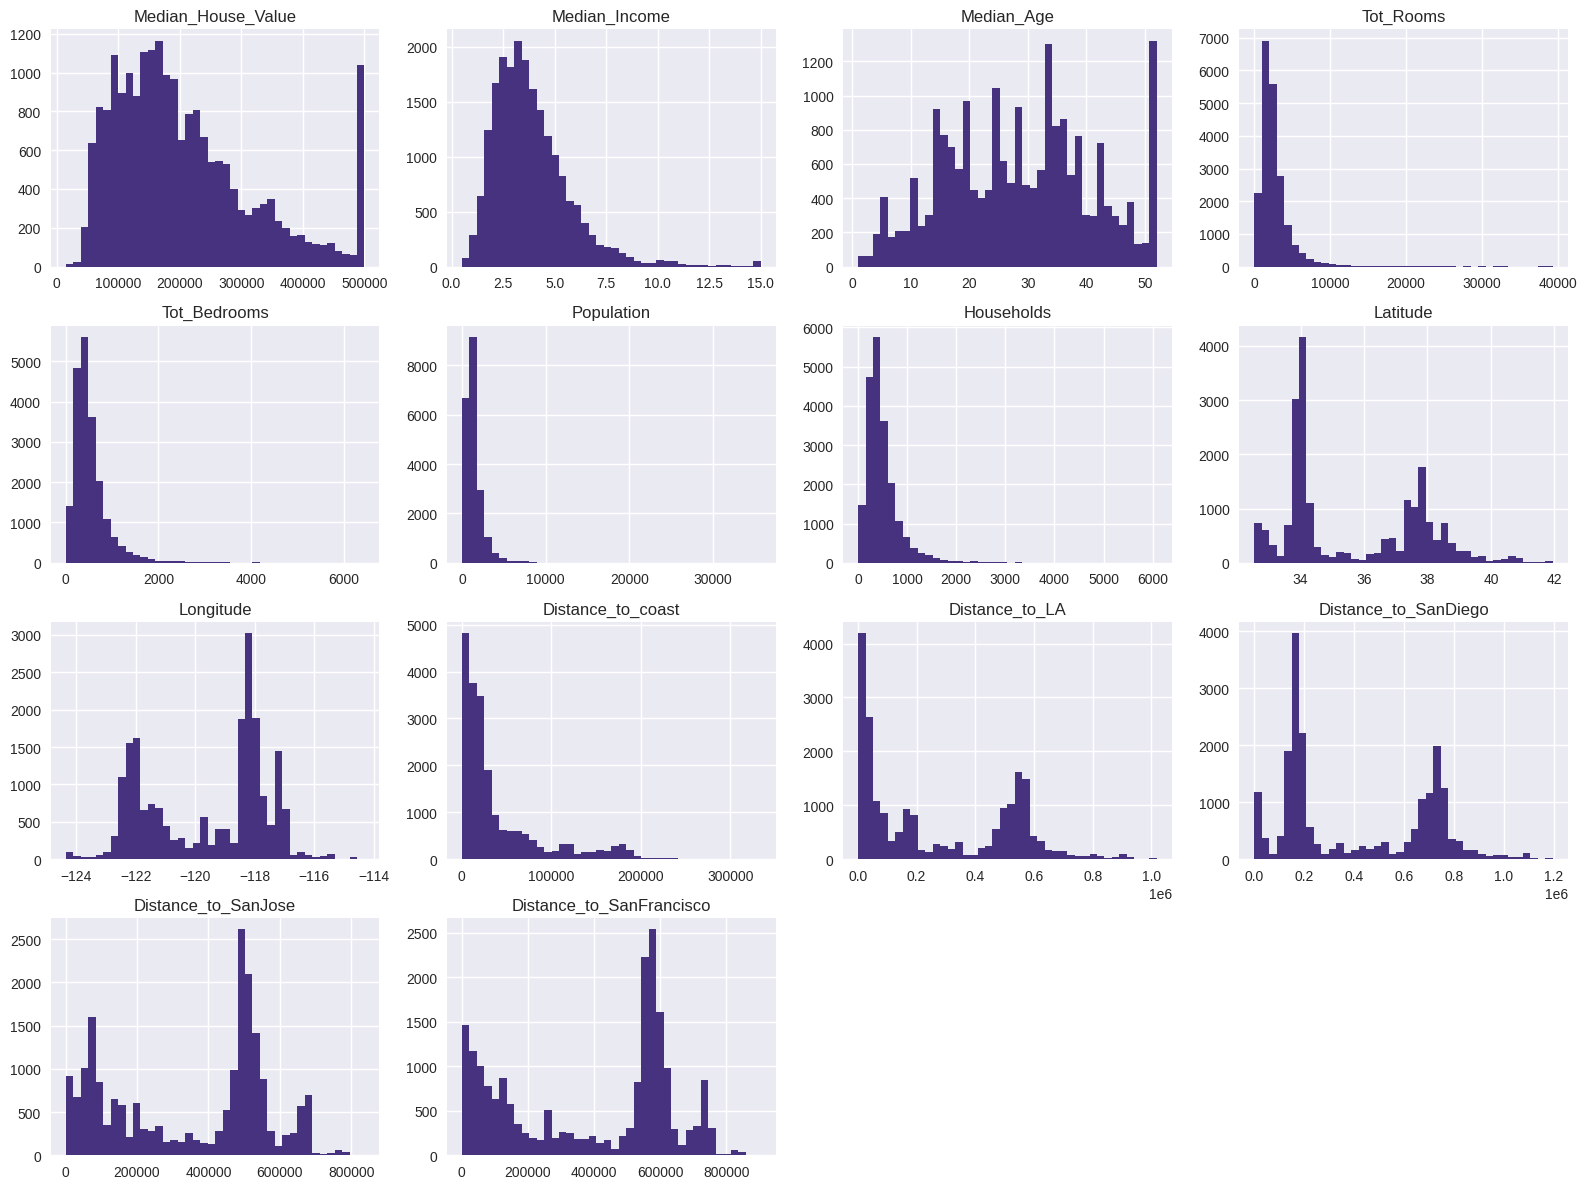

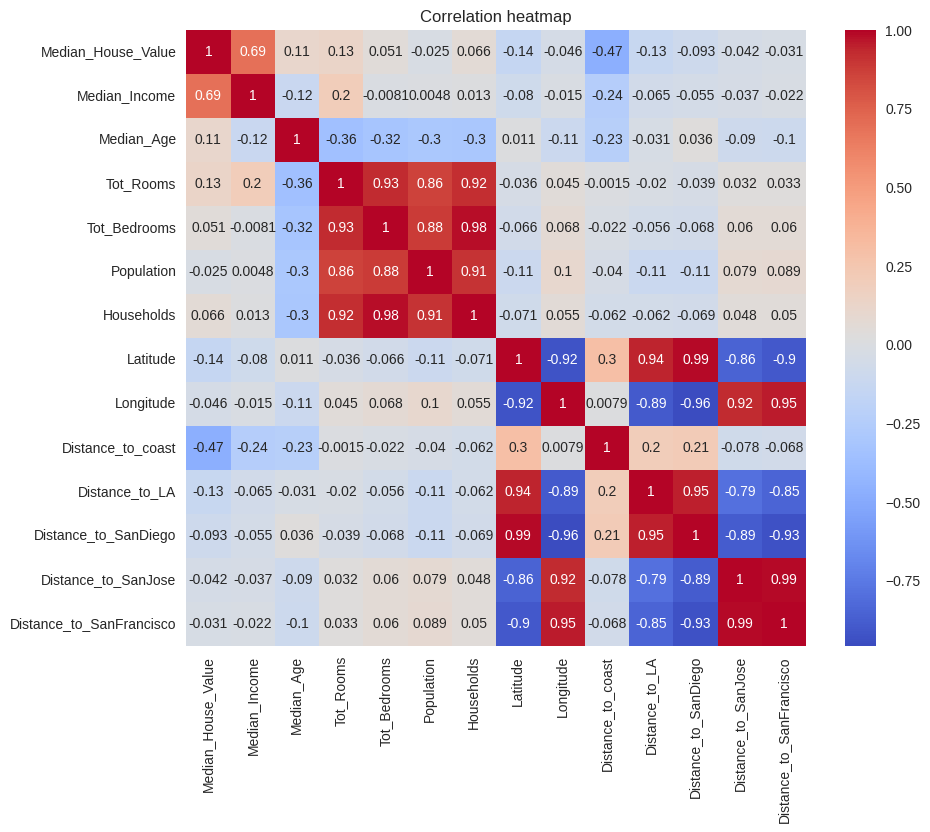

,Median_House_Value
Median_House_Value,1.000000
Median_Income,0.688075
Tot_Rooms,0.134153
Median_Age,0.105623
Households,0.065843
Tot_Bedrooms,0.050594
Population,-0.024650
Distance_to_SanFrancisco,-0.030559
Distance_to_SanJose,-0.041590
Longitude,-0.045967


In [29]:
df.head()

# Historgrams for all numeric features
df.hist(figsize=(16,12), bins=40)
plt.tight_layout()
plt.show()

#Correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

#Sort correlations with Median_House_Value
target_col = "Median_House_Value"  # adapt if the column name differs
corr_target = corr[target_col].sort_values(ascending=False)
corr_target

## 3. Target definition: regression and classification

The main regression target will be `Median_House_Value` (continuous).[page:1]  
To create a related classification task, we define an `is_expensive` label based on quantiles of `Median_House_Value`, so that roughly the top fraction of houses are labeled as expensive and the rest as not expensive.[web:28]


In [30]:
#Note: The regression target is the specific continuous numerical value that
#a regression model is designed to predict. Here, it is Median House Value.
target_reg = "Median_House_Value"

#For the classification, we define an "expensive" threshold (70th percentile)
expensive_threshold = df[target_reg].quantile(0.70)
expensive_threshold

#We create binary label: 1 = expensive, 0 = not expensive for the logistic regression.
df["is_expensive"] = (df[target_reg] >= expensive_threshold).astype(int)

df["is_expensive"].value_counts(normalize=True)


,proportion
is_expensive,
0,0.7
1,0.3


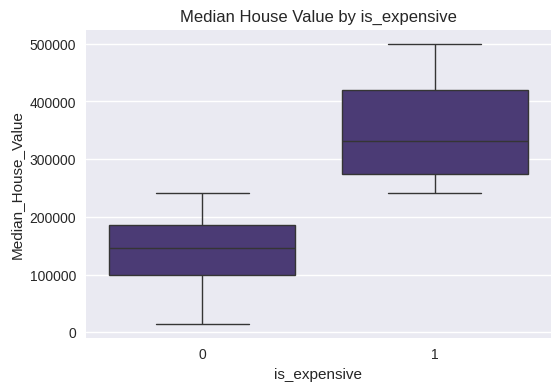

In [31]:
#Quick check of label vs features
df.groupby("is_expensive")[[target_reg, "Median_Income"]].median()

#Visualizing the distribution by class
plt.figure(figsize=(6,4))
sns.boxplot(x="is_expensive", y=target_reg, data=df)
plt.title("Median House Value by is_expensive")
plt.show()

## 4. Train–Test Split and Preprocessing (80% Train / 20% Test)

The dataset will be split for training and testing. This process will create a feature matrix so that each of the regression and classification share the same features but different target values.


In [32]:
#Identify the feature columns and targets
target_reg = "Median_House_Value"
target_class = "is_expensive"

feature_cols = [col for col in df.columns if col not in [target_reg, target_class]]

X = df[feature_cols].values
y_reg = df[target_reg].values
y_clf = df[target_class].values


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_clf  # keeps class balance for classification
)

X_train.shape, X_test.shape, y_reg_train.shape, y_clf_train.shape

((16512, 13), (4128, 13), (16512,), (16512,))

In [34]:
#We'll scale the features, this  is especially important for KNN because it is
# distance-based, and also helps linear/logistic regression converge and behave
# better when features are on very different scales.

scaler = StandardScaler()

#Fit on training features only, then transform train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]

array([[ 0.18831903,  1.13865411, -0.49599199, -0.5979926 , -0.55321504,
        -0.58484237, -0.70910098,  0.74802662,  0.02139023, -1.01727656,
        -0.7640811 ,  0.68072648,  0.71296797],
       [-0.8859827 , -0.76603024, -0.94979446, -0.76648958, -0.66708026,
        -0.75477401, -0.69503949,  0.72307026, -0.04215988, -1.02510294,
        -0.74626297,  0.65507336,  0.69070327],
       [-0.80766725,  0.74184487, -0.37810348, -0.30608937, -0.46494742,
        -0.27373675,  0.80954004,  0.58830593,  4.98933891,  0.39840361,
         0.45002024, -0.18056337, -0.1089901 ]])

## 5. Regression Models: Linear Regression vs KNN Regression

In this section, we predict `Median_House_Value` using two models:  
1. **Linear Regression**, which assumes a linear relationship between features and the target.  
2. **K-Nearest Neighbors (KNN) Regression**, a non-parametric model that predicts a value as the average of the k nearest training samples in feature space.

We will train both on the same training data, evaluate on the same test data, and compare RMSE and \(R^2\) to see which one fits this problem better.

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_reg_train)

y_reg_pred_lin = lin_reg.predict(X_test_scaled)

In [36]:
#Evaluating Linear Regression
from sklearn.metrics import mean_squared_error, r2_score

mse_lin = mean_squared_error(y_reg_test, y_reg_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_reg_test, y_reg_pred_lin)

print("Linear Regression:")
print(f"  MSE  : {mse_lin:.2f}")
print(f"  RMSE : {rmse_lin:.2f}")
print(f"  R^2  : {r2_lin:.4f}")

Linear Regression:
  MSE  : 4772583716.19
  RMSE : 69083.89
  R^2  : 0.6348


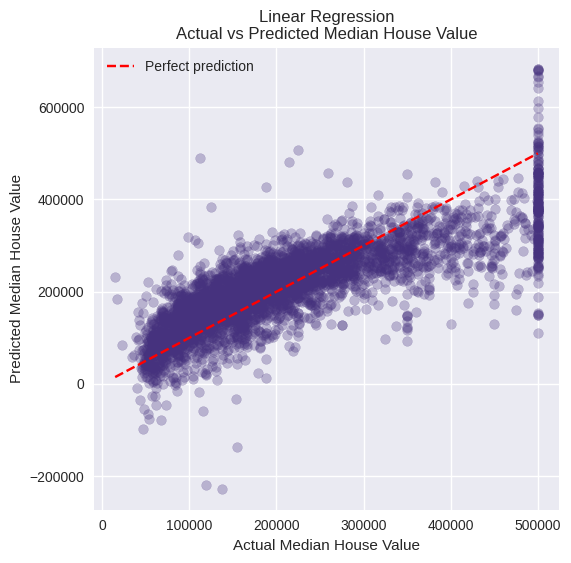

In [48]:
plt.figure(figsize=(6, 6))
plt.scatter(y_reg_test, y_reg_pred_lin, alpha=0.3)
plt.plot(
    [y_reg_test.min(), y_reg_test.max()],
    [y_reg_test.min(), y_reg_test.max()],
    "r--",
    label="Perfect prediction"
)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Linear Regression\nActual vs Predicted Median House Value")
plt.legend()
plt.grid(True)
plt.show()


### KNN Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

# Trying a few values of k
knn_results = {}

for k in [3, 5, 7, 9, 11]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_scaled, y_reg_train)
    y_reg_pred_knn = knn_reg.predict(X_test_scaled)

    mse_knn = mean_squared_error(y_reg_test, y_reg_pred_knn)
    rmse_knn = np.sqrt(mse_knn)
    r2_knn = r2_score(y_reg_test, y_reg_pred_knn)


    knn_results[k] = {"MSE": mse_knn, "RMSE": rmse_knn, "R2": r2_knn}

knn_results

{3: {'MSE': 3757342079.9416456,
  'RMSE': np.float64(61297.16208717697),
  'R2': 0.7124757833055715},
 5: {'MSE': 3422727325.133566,
  'RMSE': np.float64(58504.07955975007),
  'R2': 0.7380816087065117},
 7: {'MSE': 3425497679.9111495,
  'RMSE': np.float64(58527.751365579985),
  'R2': 0.737869612015648},
 9: {'MSE': 3447377859.82501,
  'RMSE': np.float64(58714.37524001265),
  'R2': 0.7361952684352617},
 11: {'MSE': 3414325481.7802377,
  'RMSE': np.float64(58432.229820367436),
  'R2': 0.7387245454893645}}

             MSE          RMSE        R2
3   3.757342e+09  61297.162087  0.712476
5   3.422727e+09  58504.079560  0.738082
7   3.425498e+09  58527.751366  0.737870
9   3.447378e+09  58714.375240  0.736195
11  3.414325e+09  58432.229820  0.738725


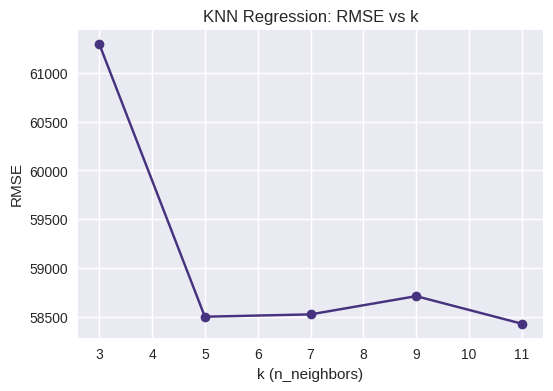

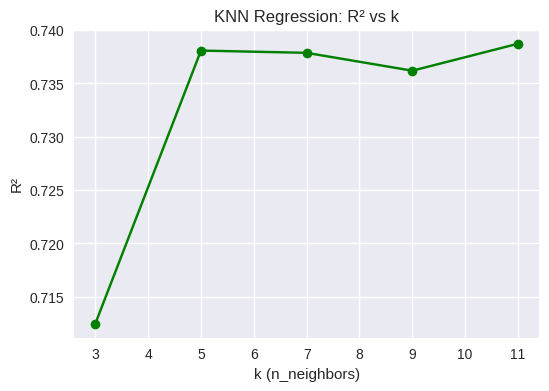

In [46]:
knn_df = pd.DataFrame(knn_results).T  # k as index
knn_df = knn_df.sort_index()

print(knn_df)

plt.figure(figsize=(6, 4))
plt.plot(knn_df.index, knn_df["RMSE"], marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("RMSE")
plt.title("KNN Regression: RMSE vs k")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(knn_df.index, knn_df["R2"], marker="o", color="green")
plt.xlabel("k (n_neighbors)")
plt.ylabel("R²")
plt.title("KNN Regression: R² vs k")
plt.grid(True)
plt.show()


Best k by RMSE: 11


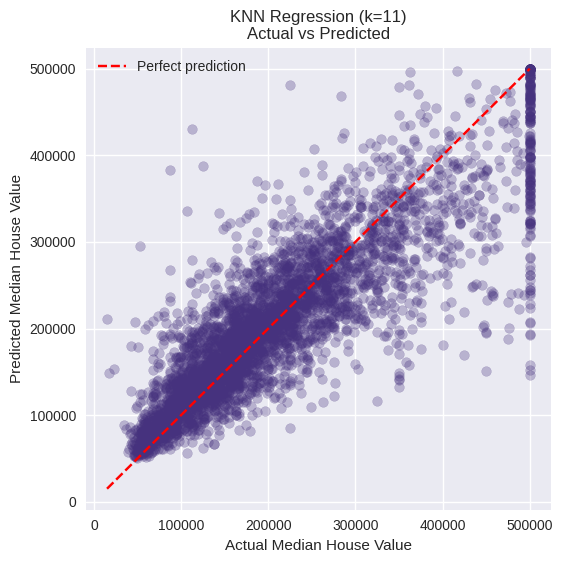

In [47]:
best_k = min(knn_results, key=lambda k: knn_results[k]["RMSE"])
print("Best k by RMSE:", best_k)

# Refit with best_k to get predictions
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train_scaled, y_reg_train)
y_reg_pred_best = best_knn_reg.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_reg_test, y_reg_pred_best, alpha=0.3)
plt.plot([y_reg_test.min(), y_reg_test.max()],
         [y_reg_test.min(), y_reg_test.max()],
         "r--", label="Perfect prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"KNN Regression (k={best_k})\nActual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


## 6. Classification Models: Logistic Regression vs KNN

Here, the goal is to predict the binary label `is_expensive` (1 = expensive, 0 = not expensive) using the same features.
We compare **Logistic Regression**, a linear probabilistic classifier, with **K-Nearest Neighbors (KNN) Classifier**, a non-parametric, distance-based method.

Models will be evaluated using accuracy, precision, recall, F1-score, and ROC-AUC.


### Logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
log_reg.fit(X_train_scaled, y_clf_train)

y_clf_pred_log = log_reg.predict(X_test_scaled)
y_clf_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]  # probability of class 1

Logistic Regression (is_expensive):
Accuracy : 0.8597383720930233
Precision: 0.7887817703768624
Recall   : 0.7269789983844911
F1-score : 0.7566204287515763
ROC-AUC  : 0.9231557205225528

Confusion matrix:
[[2649  241]
 [ 338  900]]

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2890
           1       0.79      0.73      0.76      1238

    accuracy                           0.86      4128
   macro avg       0.84      0.82      0.83      4128
weighted avg       0.86      0.86      0.86      4128



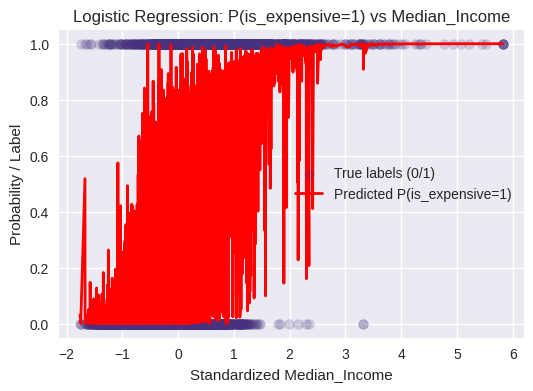

In [44]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)
from sklearn.metrics import RocCurveDisplay

print("Logistic Regression (is_expensive):")

print("Accuracy :", accuracy_score(y_clf_test, y_clf_pred_log))
print("Precision:", precision_score(y_clf_test, y_clf_pred_log))
print("Recall   :", recall_score(y_clf_test, y_clf_pred_log))
print("F1-score :", f1_score(y_clf_test, y_clf_pred_log))
print("ROC-AUC  :", roc_auc_score(y_clf_test, y_clf_proba_log))

print("\nConfusion matrix:")
print(confusion_matrix(y_clf_test, y_clf_pred_log))

print("\nClassification report:")
print(classification_report(y_clf_test, y_clf_pred_log))

feat_name = "Median_Income"
feat_idx = feature_cols.index(feat_name)

# Use test set for a nice spread of values
x_feat = X_test_scaled[:, feat_idx]
proba = y_clf_proba_log

# Sort by feature value to draw a smooth curve
order = np.argsort(x_feat)
x_sorted = x_feat[order]
proba_sorted = proba[order]

plt.figure(figsize=(6, 4))
plt.scatter(x_feat, y_clf_test, alpha=0.2, label="True labels (0/1)")
plt.plot(x_sorted, proba_sorted, color="red", linewidth=2, label="Predicted P(is_expensive=1)")
plt.xlabel(f"Standardized {feat_name}")
plt.ylabel("Probability / Label")
plt.title(f"Logistic Regression: P(is_expensive=1) vs {feat_name}")
plt.legend()
plt.grid(True)
plt.show()



### KNN Classification

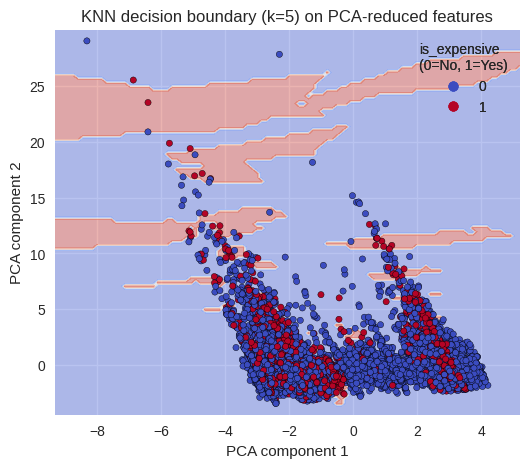

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_results = {}

for k in [3, 5, 7, 9, 11]:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_scaled, y_clf_train)

    y_clf_pred_knn = knn_clf.predict(X_test_scaled)
    y_clf_proba_knn = knn_clf.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_clf_test, y_clf_pred_knn)
    f1 = f1_score(y_clf_test, y_clf_pred_knn)
    roc = roc_auc_score(y_clf_test, y_clf_proba_knn)

    knn_clf_results[k] = {"Accuracy": acc, "F1": f1, "ROC_AUC": roc}

knn_clf_results
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# 1) Reduce to 2D with PCA for visualization only
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_train_2d = pca.fit_transform(X_train_scaled)
X_test_2d = pca.transform(X_test_scaled)

# 2) Fit a KNN classifier on the 2D data (choose a k, e.g. 5)
best_k = 5  # change if you found a better k
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_train_2d, y_clf_train)

# 3) Plot decision boundary + points
fig, ax = plt.subplots(figsize=(6, 5))

DecisionBoundaryDisplay.from_estimator(
    knn_2d,
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.4,
    ax=ax,
)

scatter = ax.scatter(
    X_train_2d[:, 0],
    X_train_2d[:, 1],
    c=y_clf_train,
    edgecolor="k",
    cmap=plt.cm.coolwarm,
    s=20,
)

ax.set_title(f"KNN decision boundary (k={best_k}) on PCA-reduced features")
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
legend1 = ax.legend(
    *scatter.legend_elements(),
    title="is_expensive\n(0=No, 1=Yes)",
    loc="upper right"
)
ax.add_artist(legend1)
plt.show()



In [41]:
knn_clf_df = pd.DataFrame(knn_clf_results).T
knn_clf_df = knn_clf_df.sort_index()
knn_clf_df


,Accuracy,F1,ROC_AUC
3,0.855620,0.750210,0.893319
5,0.860223,0.754154,0.917284
7,0.866279,0.762069,0.922286
9,0.869186,0.766638,0.926730
11,0.872820,0.771042,0.931926


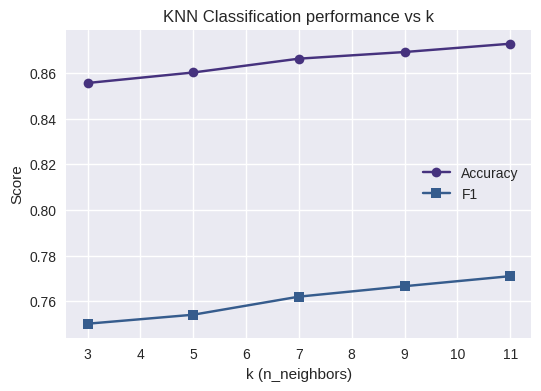

In [42]:
plt.figure(figsize=(6,4))
plt.plot(knn_clf_df.index, knn_clf_df["Accuracy"], marker="o", label="Accuracy")
plt.plot(knn_clf_df.index, knn_clf_df["F1"], marker="s", label="F1")
plt.xlabel("k (n_neighbors)")
plt.ylabel("Score")
plt.title("KNN Classification performance vs k")
plt.legend()
plt.grid(True)
plt.show()
